# Machine learning model predicting cryptocurrency prices #

In [1]:
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# setting timeframe for data
today = date.today()
start_date = '2016-01-01'
end_date = today.strftime("%Y-%m-%d")
end_date

'2022-03-30'

In [4]:
# downloading data from Yahoo Finance
data = yf.download('BTC-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data

,Date,Open,High,Low,Close,Volume
0,2015-12-31,425.875000,432.920990,418.734985,430.566986,45996600
1,2016-01-01,430.721008,436.246002,427.515015,434.334015,36278900
2,2016-01-02,434.622009,436.062012,431.869995,433.437988,30096600
3,2016-01-03,433.578003,433.743011,424.705994,430.010986,39633800
4,2016-01-04,430.061005,434.516998,429.084015,433.091003,38477500
...,...,...,...,...,...,...
2276,2022-03-25,43964.546875,44999.492188,43706.285156,44348.730469,30574413034
2277,2022-03-26,44349.859375,44735.996094,44166.273438,44500.828125,16950455995
2278,2022-03-27,44505.355469,46827.546875,44437.292969,46820.492188,28160889722
2279,2022-03-28,46821.851562,48086.835938,46690.203125,47128.003906,36362175703


In [23]:
# filtering data from starting from 2020-01-01
#assign to df data you want to work with
df = data[data.Date >= '2020-01-01']
df

,Date,Open,High,Low,Close,Volume
1462,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,18565664997
1463,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,20802083465
1464,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,28111481032
1465,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,18444271275
1466,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,19725074095
...,...,...,...,...,...,...
2276,2022-03-25,43964.546875,44999.492188,43706.285156,44348.730469,30574413034
2277,2022-03-26,44349.859375,44735.996094,44166.273438,44500.828125,16950455995
2278,2022-03-27,44505.355469,46827.546875,44437.292969,46820.492188,28160889722
2279,2022-03-28,46821.851562,48086.835938,46690.203125,47128.003906,36362175703


In [6]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
               open=df['Open'],
               high=df['High'],
               low=df['Low'],
               close=df['Close'])])

fig.update_layout(
    title={
        'text': 'Bitcoin price against USD',
        'yanchor': 'top'
    })
fig.show()

In [7]:
# filtering data from extreme volum spike (one is occuring)
df = df[df.Volume <2.5e+11]
# dataframe with price and volume
df_v_p = df[['Date', 'Close', 'Volume']]
df_v_p

,Date,Close,Volume
1462,2020-01-01,7200.174316,18565664997
1463,2020-01-02,6985.470215,20802083465
1464,2020-01-03,7344.884277,28111481032
1465,2020-01-04,7410.656738,18444271275
1466,2020-01-05,7411.317383,19725074095
...,...,...,...
2276,2022-03-25,44348.730469,30574413034
2277,2022-03-26,44500.828125,16950455995
2278,2022-03-27,46820.492188,28160889722
2279,2022-03-28,47128.003906,36362175703


(2,)


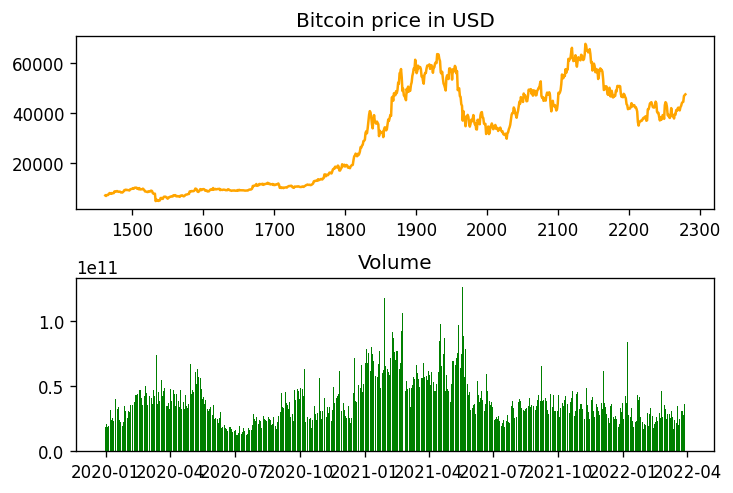

In [8]:
# subplots showing relation between price and volume
fig, ax = plt.subplots(2, 1, figsize=(6, 4), constrained_layout=True, dpi=120)

ax[0].set_title("Bitcoin price in USD")
ax[0].plot(df['Close'], color='orange')
ax[1].set_title("Volume")
ax[1].bar(x=df['Date'], height=df['Volume'], color='green')
print(ax.shape)


## Bulding a model ##

In [9]:
from scipy.interpolate import interp1d
import numpy as np

In [14]:
# checking average price from open and close of the trading day
price = df[['Open', 'Close']].mean(axis=1)
x = np.arange(0, len(price))
price

1462     7197.533203
1463     7094.010742
1464     7164.656494
1465     7378.016113
1466     7410.884521
            ...     
2276    44156.638672
2277    44425.343750
2278    45662.923828
2279    46974.927734
2280    47283.083984
Length: 818, dtype: float64

In [15]:
f_pred = interp1d(x, price, fill_value="extrapolate")
xnew = np.linspace(0, len(x)+100, len(x))
pred_price = f_pred(xnew)

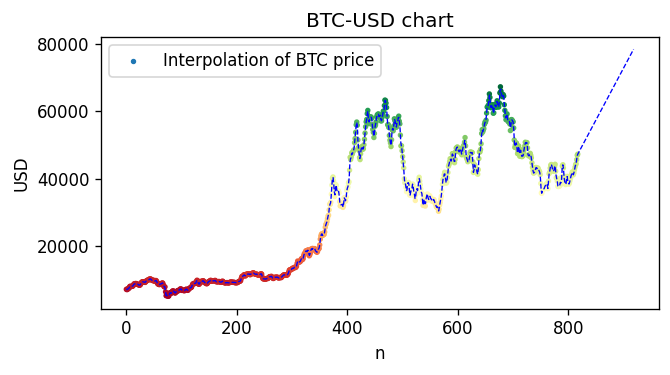

In [17]:
plt.figure(figsize=(6, 3), dpi=120)
plt.scatter(x, price, label='Interpolation of BTC price', c=price ,cmap='RdYlGn', s=5)
plt.plot(xnew, pred_price, '--', c='blue', linewidth=.8)
plt.title('BTC-USD chart')
plt.xlabel('n')
plt.ylabel('USD')
plt.legend()
plt.show()

### Results of the prediction ###

We go to the MOON!


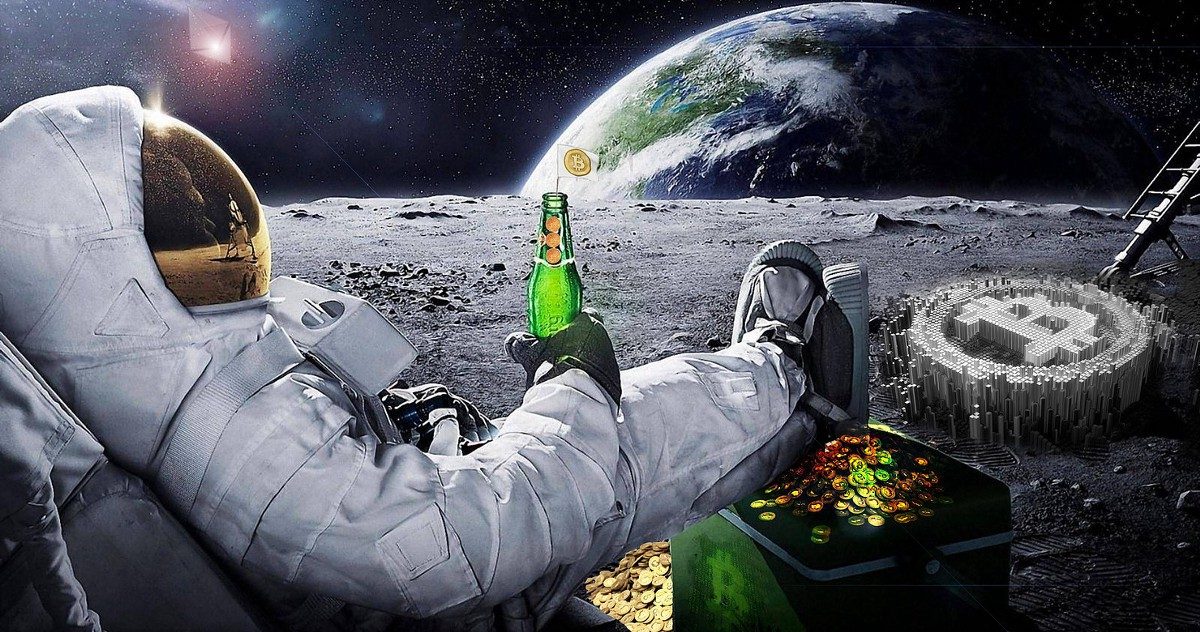

In [22]:
from IPython.display import Image, display
from time import time
from time import sleep

if np.average(pred_price[-100:-1]) > np.average(price[-500:-100]):
    print('We go to the MOON!')
    sleep(2)
    display(Image('moon_crypto.jpg', height=300))

else:
    print('McDonalds cashier?')
    sleep(2)
    display(Image('McDonalds.jpg', height=300))

## Aplaying same method for Polkadot token price ##
polkadot ecosystem: https://polkadot.network/

In [31]:
# downloading data from Yahoo Finance
data = yf.download('DOT-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data

,Date,Open,High,Low,Close,Volume
0,2020-08-20,2.787857,3.077784,2.692896,2.900080,48819867
1,2020-08-21,2.896923,3.090093,2.730919,2.875028,49313137
2,2020-08-22,2.878570,4.510613,2.816762,4.484690,485801096
3,2020-08-23,4.487058,4.487058,3.716271,3.967066,320749483
4,2020-08-24,3.987413,4.783158,3.812670,4.602614,407690171
...,...,...,...,...,...,...
535,2022-03-18,18.748987,19.180634,18.184626,18.991892,751608989
536,2022-03-19,18.991165,19.767376,18.914698,19.359505,833974878
537,2022-03-20,19.362869,19.442106,18.390905,18.638643,688372541
538,2022-03-21,18.636242,19.048409,18.474392,18.795271,726848268


In [29]:
# filtering data from starting from 2020-01-01
#assign to df data you want to work with
df = data[data.Date >= '2020-01-01']
df

,Date,Open,High,Low,Close,Volume
783,2020-01-01,0.032832,0.033813,0.032704,0.033458,22948374
784,2020-01-02,0.033474,0.033507,0.032448,0.032751,20843934
785,2020-01-03,0.032748,0.034427,0.032491,0.034180,30162644
786,2020-01-04,0.034191,0.034685,0.033872,0.034595,29535781
787,2020-01-05,0.034574,0.035356,0.034545,0.034721,21479178
...,...,...,...,...,...,...
1597,2022-03-25,1.130228,1.163815,1.075631,1.097888,2232929187
1598,2022-03-26,1.098015,1.157231,1.082272,1.150594,1407171432
1599,2022-03-27,1.151006,1.183395,1.108125,1.182148,1322194562
1600,2022-03-28,1.182334,1.242865,1.162468,1.170184,2304056098


In [30]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
               open=df['Open'],
               high=df['High'],
               low=df['Low'],
               close=df['Close'])])

fig.update_layout(
    title={
        'text': 'Polkadot price against USD',
        'yanchor': 'top'
    })
fig.show()

(2,)


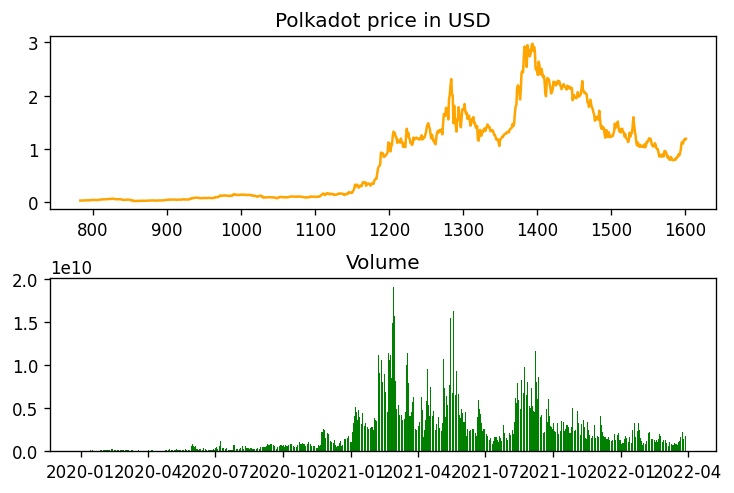

In [33]:
# subplots showing relation between price and volume
fig, ax = plt.subplots(2, 1, figsize=(6, 4), constrained_layout=True, dpi=120)

ax[0].set_title("Polkadot price in USD")
ax[0].plot(df['Close'], color='orange')
ax[1].set_title("Volume")
ax[1].bar(x=df['Date'], height=df['Volume'], color='green')
print(ax.shape)

In [34]:
# checking average price from open and close of the trading day
price = df[['Open', 'Close']].mean(axis=1)
x = np.arange(0, len(price))
price

783     0.033145
784     0.033112
785     0.033464
786     0.034393
787     0.034647
          ...   
1597    1.114058
1598    1.124304
1599    1.166577
1600    1.176259
1601    1.180199
Length: 819, dtype: float64

In [35]:
f_pred = interp1d(x, price, fill_value="extrapolate")
xnew = np.linspace(0, len(x)+100, len(x))
pred_price = f_pred(xnew)

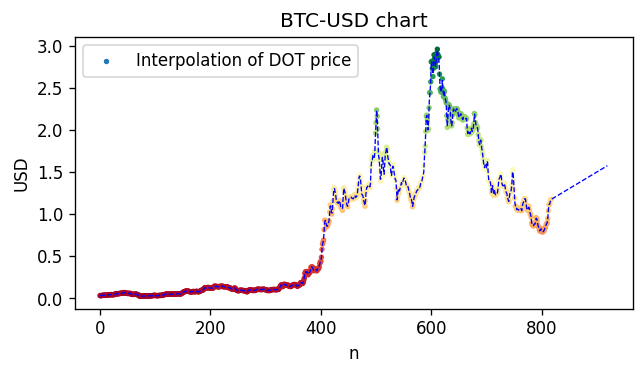

In [36]:
plt.figure(figsize=(6, 3), dpi=120)
plt.scatter(x, price, label='Interpolation of DOT price', c=price ,cmap='RdYlGn', s=5)
plt.plot(xnew, pred_price, '--', c='blue', linewidth=.8)
plt.title('BTC-USD chart')
plt.xlabel('n')
plt.ylabel('USD')
plt.legend()
plt.show()